# Research Questions
1. How do the risk factors differ for different age groups of patients?
2. How do the risk factors differ for male vs female patients?
3. What is the relation of pollution to the level of cancer in patients?
4. What is the relation of smoking habits to the level of cancer in patients?


In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib as path
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key

In [2]:
# Load in csv
new_df = pd.read_csv("Resources/cancer_patient.csv")
new_df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# Looking at the diffrent columns in the data set
new_df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [4]:
#Data types
new_df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [5]:
#Determining the age range of data set and mean.
patients_age_min= new_df["Age"].min()
patients_age_max= new_df["Age"].max()
patients_age_mean= new_df["Age"].mean()
print(patients_age_min)
print(patients_age_max)
print(patients_age_mean)


14
73
37.174


In [6]:
cancer_df = new_df.drop(new_df.columns[[0,15, 16, 17, 18, 19, 20, 21, 22, 23, 24]], axis=1)
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,7,7,8,7,High
996,P996,37,2,6,8,7,7,7,6,7,7,7,8,7,High
997,P997,25,2,4,5,6,5,5,4,6,7,2,3,4,High
998,P998,18,2,6,8,7,7,7,6,7,7,8,7,7,High


In [7]:
#Repopulate wih feamile and males
cancer_df.loc[cancer_df["Gender"] == 1, "Gender"] = "Male"
cancer_df.loc[cancer_df["Gender"] == 2, "Gender"] = "Female"
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Level
0,P1,33,Male,2,4,5,4,3,2,2,4,3,2,2,Low
1,P10,17,Male,3,1,5,3,4,2,2,2,2,4,2,Medium
2,P100,35,Male,4,5,6,5,5,4,6,7,2,3,4,High
3,P1000,37,Male,7,7,7,7,6,7,7,7,7,7,7,High
4,P101,46,Male,6,8,7,7,7,6,7,7,8,7,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,7,7,8,7,High
996,P996,37,Female,6,8,7,7,7,6,7,7,7,8,7,High
997,P997,25,Female,4,5,6,5,5,4,6,7,2,3,4,High
998,P998,18,Female,6,8,7,7,7,6,7,7,8,7,7,High


In [8]:
patient_count =cancer_df["Patient Id"].unique()
len(patient_count)


1000

Text(0.5, 1.0, 'Age Distribution')

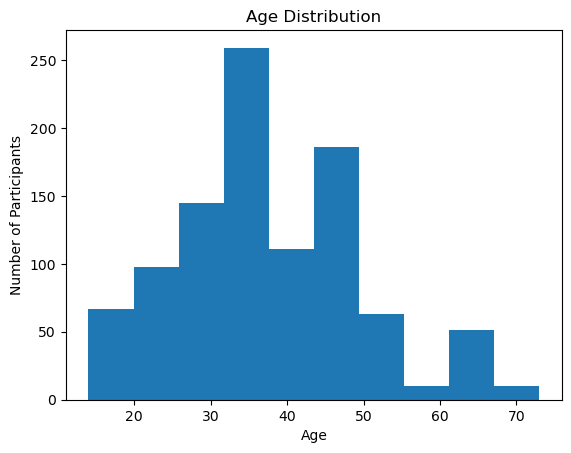

In [9]:
#Age distrubition of patients
plt.hist(cancer_df["Age"])
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.title("Age Distribution")

In [10]:
#
gender_numbers= cancer_df["Gender"].value_counts()
gender_numbers

Male      598
Female    402
Name: Gender, dtype: int64

In [11]:
#Distribution by gender
labels = ["Male", "Female"]
sizes = [598,402]
colors = [ "lightskyblue","lightcoral"]
explode = ( 0.15, 0)

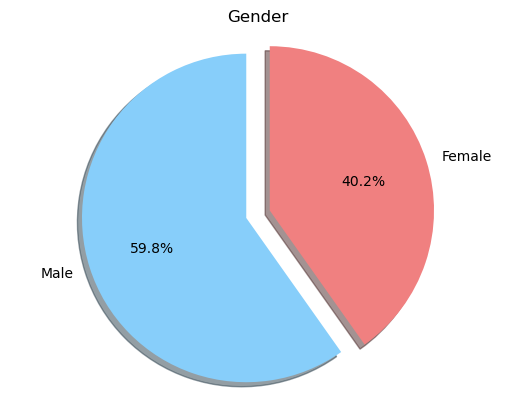

In [12]:
#Pie graph by gender
plt.title("Gender")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [13]:
# Seperation by gender
male_cancer= cancer_df.loc[cancer_df["Gender"]== "Male"]
female_cancer = cancer_df.loc[cancer_df["Gender"]== "Female"]


In [14]:
#finding the mean values based on gender and different categories
male_polltion = male_cancer["Air Pollution"]. mean()
female_pollution = female_cancer["Air Pollution"]. mean()
male_drinking = male_cancer["Air Pollution"]. mean()
female_drinking = female_cancer["Smoking"]. mean()
male_smoking = male_cancer["Air Pollution"]. mean()
female_smoking = male_cancer["Air Pollution"]. mean()
male_passive_smoking = male_cancer["Passive Smoker"]. mean()
female_passive_smoking = male_cancer["Passive Smoker"]. mean()

Text(0.5, 1.0, 'Average Pollution per Gender')

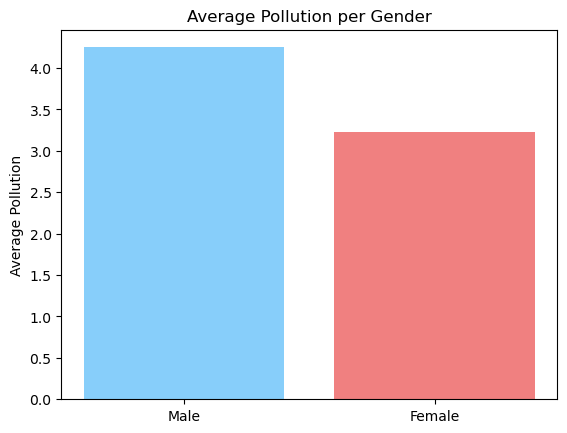

In [15]:
#Bar graph based on gender and Pollution

genders = ['Male', 'Female']
colors = ["lightskyblue","lightcoral"]
total_pollution = [male_polltion, female_pollution]
plt.bar(genders,total_pollution, color=colors)
plt.ylabel("Average Pollution")
plt.title("Average Pollution per Gender")

Text(0.5, 1.0, 'Average Drinking per Gender')

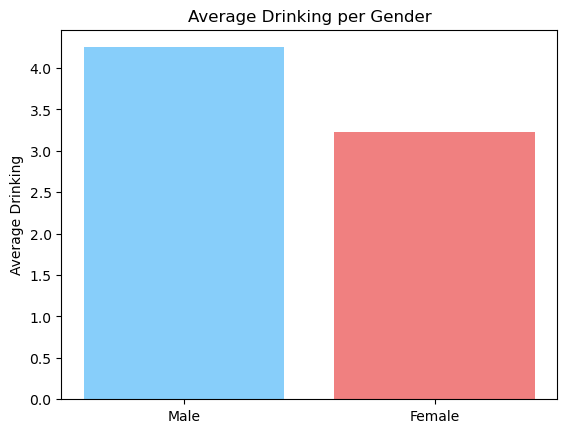

In [16]:
#Bar graph based on average Drinking seperated by gender
total_drinking= [male_drinking, female_drinking]
plt.bar(genders,total_pollution, color=colors)
plt.ylabel("Average Drinking")
plt.title("Average Drinking per Gender")


Text(0.5, 1.0, 'Average Smoking per Gender')

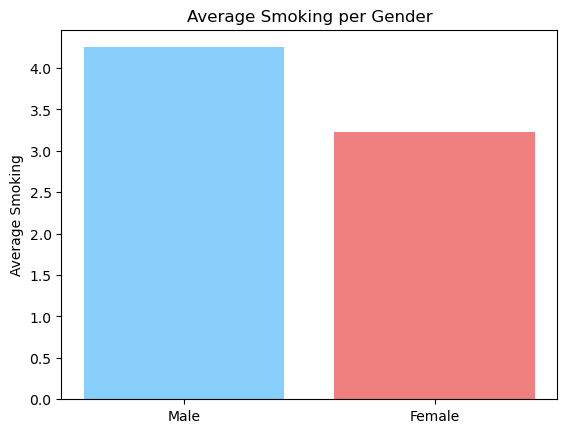

In [17]:
#Bar graph based on average Smoking seperated by gender
total_smoking = [male_smoking, female_smoking]
plt.bar(genders,total_pollution, color=colors)
plt.ylabel("Average Smoking")
plt.title("Average Smoking per Gender")

Text(0.5, 1.0, 'Average Passive Smoking per Gender')

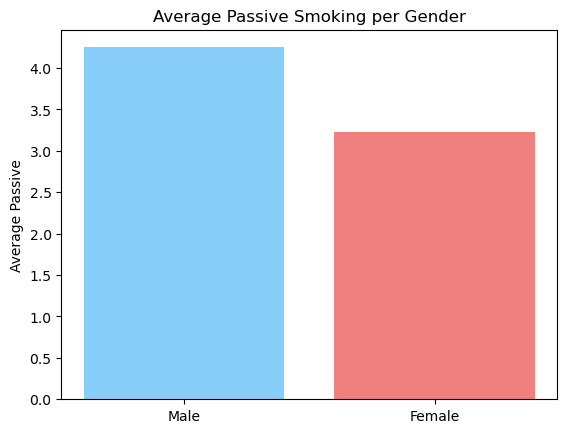

In [18]:
#Bar graph based on average Passive Smoking seperated by gender
total_passive = [male_passive_smoking, female_passive_smoking]
plt.bar(genders,total_pollution, color=colors)
plt.ylabel("Average Passive")
plt.title("Average Passive Smoking per Gender")

In [19]:
gender_level = cancer_df.groupby('Level')['Gender']. value_counts()
gender_level


Level   Gender
High    Male      252
        Female    113
Low     Female    154
        Male      149
Medium  Male      197
        Female    135
Name: Gender, dtype: int64

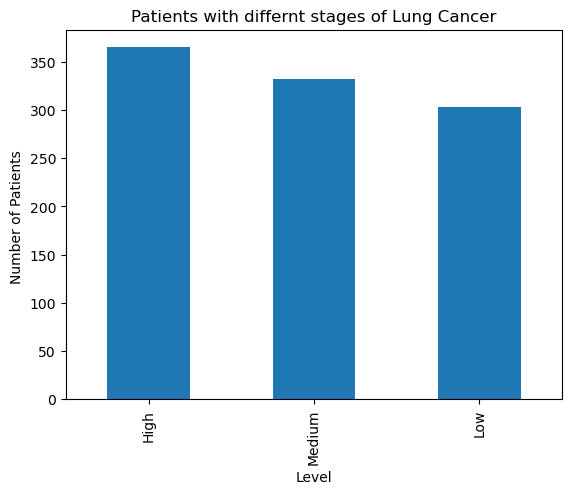

In [20]:
#Level of lung Cancer in patients
total_levels = new_df["Level"].value_counts()
total_levels.plot(kind= "bar")
plt.xlabel("Level")
plt.xticks(rotation = 90)
plt.ylabel("Number of Patients ")
plt.title("Patients with differnt stages of Lung Cancer")
plt.show()

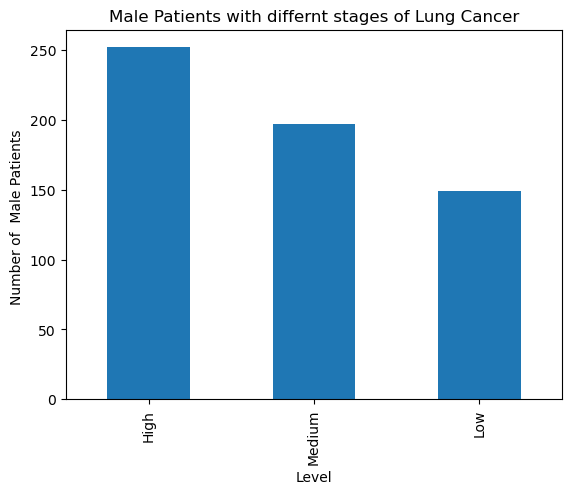

In [21]:
#Levels of lung cancer in male patients
male_lung_cancer = male_cancer["Level"].value_counts()
male_lung_cancer.plot(kind= "bar")
plt.xlabel("Level")
plt.ylabel("Number of  Male Patients ")
plt.title("Male Patients with differnt stages of Lung Cancer")
plt.show()

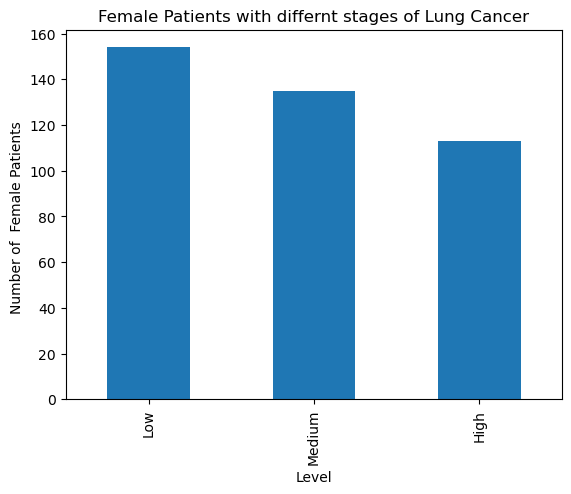

In [22]:
#Levels of Lung Cancer in Females
female_lung_cancer = female_cancer["Level"].value_counts()
female_lung_cancer.plot(kind= "bar")
plt.xlabel("Level")
plt.ylabel("Number of  Female Patients ")
plt.title("Female Patients with differnt stages of Lung Cancer")
plt.show()

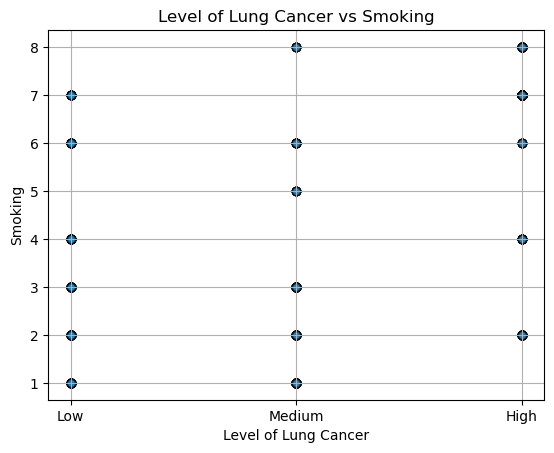

In [23]:
#Scatter plot based on smoking


plt.scatter(cancer_df["Level"], cancer_df["Smoking"], edgecolors= "black",linewidths=1,marker="o",alpha=0.5)
plt.xlabel('Level of Lung Cancer')
plt.ylabel('Smoking')
plt.title('Level of Lung Cancer vs Smoking')
plt.grid(True)
plt.show()


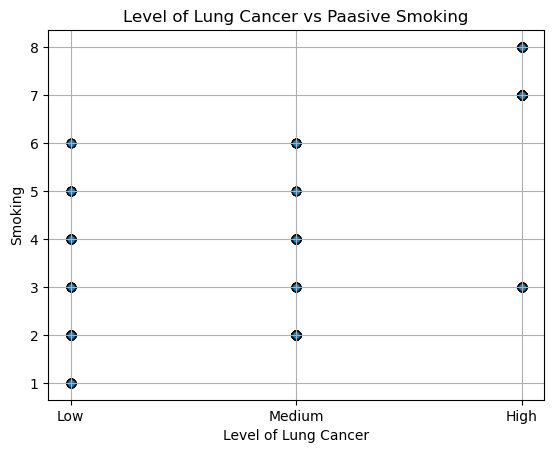

In [24]:
plt.scatter(new_df["Level"], new_df["Passive Smoker"], edgecolors= "black",linewidths=1,marker="o",alpha=0.5)
plt.xlabel('Level of Lung Cancer')
plt.ylabel('Smoking')
plt.title('Level of Lung Cancer vs Paasive Smoking')
plt.grid(True)
plt.show()

In [25]:
#Creating bins based on age
bins= [0, 15, 30, 45, 60, 75]
age_groups =["0-15yrs", "16-30yrs", "31-45yrs", "46-60yrs", "60-75yrs"]


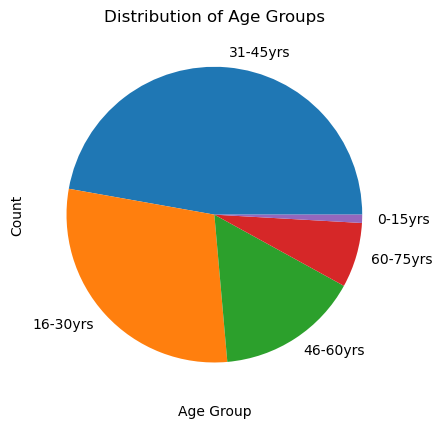

In [26]:
#Distribution of age by bins
age_bins = pd.cut(cancer_df["Age"], bins, labels=age_groups)
age_bins.value_counts().plot(kind= 'pie')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
plt.show()


In [27]:
# Seperating base on level of cancer
pollution_level_high= cancer_df.loc[cancer_df["Level"] == "High"] 
pollution_level_med= cancer_df.loc[cancer_df["Level"] == "Medium"] 
pollution_level_low= cancer_df.loc[cancer_df["Level"] == "Low"] 

In [120]:
#Creating bins to show level of smoking
new_bins= [1,2,3,4,5,6,8]
pollution_groups= ["None", "Low", "Moderatly Low", "Moderate", "Moderatly High", "High"]



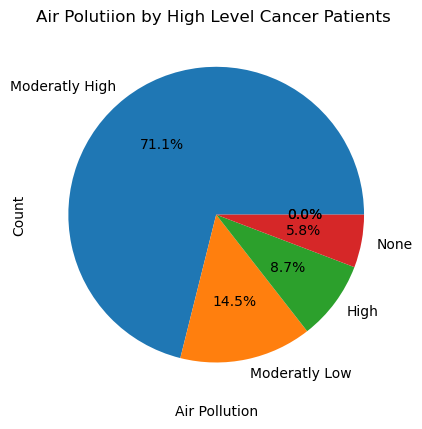

In [58]:
#Making a pie chart
pollution_bins = pd.cut(pollution_level_high["Air Pollution"], new_bins, labels=pollution_groups)
pollution_bins.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Air Pollution")
plt.ylabel("Count")
plt.title("Air Polutiion by High Level Cancer Patients ")
plt.show()


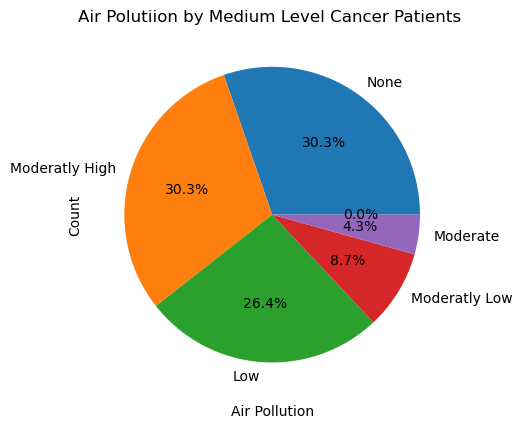

In [60]:
# Another Pie chart
pollution_bins_med = pd.cut(pollution_level_med["Air Pollution"], new_bins, labels=pollution_groups)
pollution_bins_med.value_counts().plot(kind= 'pie',autopct='%1.1f%%')
plt.xlabel("Air Pollution")
plt.ylabel("Count")
plt.title("Air Polutiion by Medium Level Cancer Patients ")
plt.show()

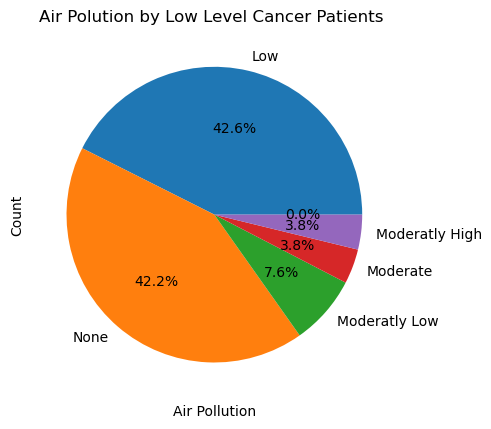

In [61]:
#Pie Charts!
pollution_bins_low = pd.cut(pollution_level_low["Air Pollution"], new_bins, labels=pollution_groups)
pollution_bins_low.value_counts().plot(kind= 'pie',autopct='%1.1f%%')
plt.xlabel("Air Pollution")
plt.ylabel("Count")
plt.title("Air Polution by Low Level Cancer Patients ")
plt.show()

In [32]:
#To make a box plot
levels= ['Low', 'Medium', 'High']
pol= []
for levels in levels:
    pollution_levels_df= cancer_df.loc[cancer_df['Level']== levels, 'Air Pollution' ]
    pol.append(pollution_levels_df)

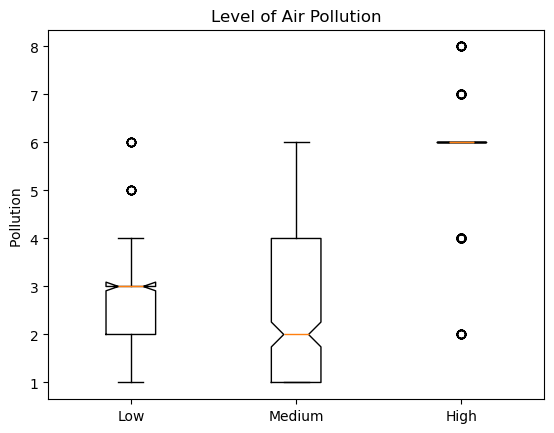

In [33]:
fig1, ax1 = plt.subplots()
ax1.boxplot(pol, levels)
ax1.set_title('Level of Air Pollution')
ax1.set_ylabel('Pollution ')
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])
plt.show()

In [121]:
levels_s= ['Low', 'Medium', 'High']
smoking_l= []
for levels_s in levels_s:
    smoking_levels_df= cancer_df.loc[cancer_df['Level']== levels_s, 'Smoking' ]
    smoking_l.append(smoking_levels_df)
    quartiles= smoking_levels_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    

In [212]:
correlation_coefficient, p_value = linregress(cancer_df['Smoking'], cancer_df['Level'])


print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

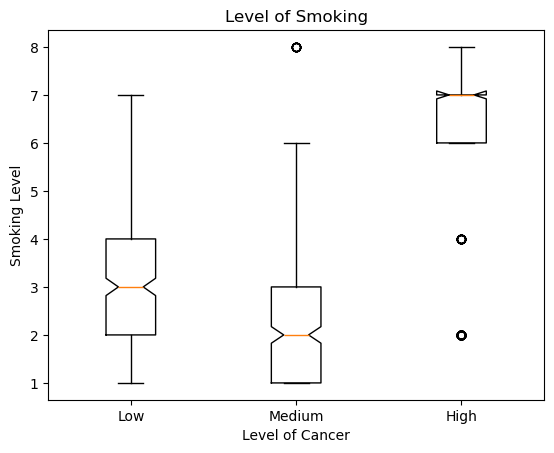

In [122]:
fig2, ax3 = plt.subplots()
ax3.boxplot(smoking_l, levels_s)
ax3.set_title('Level of Smoking')
ax3.set_ylabel('Smoking Level')
ax3.set_xlabel('Level of Cancer')
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])
plt.show()

In [123]:
levels_ps= ['Low', 'Medium', 'High']
smoking_ps= []
for levels_ps in levels_ps:
    passive_smoking_levels_df= cancer_df.loc[cancer_df['Level']== levels_ps, 'Passive Smoker' ]
    smoking_ps.append(passive_smoking_levels_df)

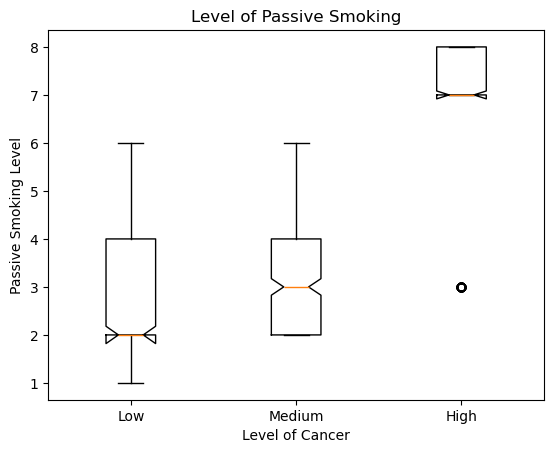

In [124]:
fig3, ax2 = plt.subplots()
ax2.boxplot(smoking_ps, levels_ps)
ax2.set_title('Level of Passive Smoking')
ax2.set_ylabel('Passive Smoking Level')
ax2.set_xlabel('Level of Cancer')
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])
plt.show()

In [117]:
#Finding the average of the smoking levels

smoking_mean= cancer_df.groupby('Level')['Smoking']. mean()
smoking_mean

Level
High      6.073973
Low       3.023102
Medium    2.454819
Name: Smoking, dtype: float64

In [39]:
#Looking at the counts in each smoking level

smoking_level = cancer_df.groupby('Level')['Smoking']. value_counts()
smoking_level

Level   Smoking
High    7          187
        8           79
        2           70
        4           19
        6           10
Low     2           81
        3           71
        1           61
        4           40
        6           30
        7           20
Medium  1          120
        3          101
        2           71
        6           20
        5           10
        8           10
Name: Smoking, dtype: int64

In [75]:
#Looking at the counts for each passive smoking level
passive_smoking_level = cancer_df.groupby('Level')['Passive Smoker']. value_counts()
passive_smoking_level

Level   Passive Smoker
High    7                 187
        8                 108
        3                  70
Low     2                 122
        4                  61
        1                  60
        3                  30
        5                  20
        6                  10
Medium  2                 162
        4                 100
        3                  40
        6                  20
        5                  10
Name: Passive Smoker, dtype: int64

In [119]:
#Calculating the mean of passive smoking level
passive_mean =cancer_df.groupby('Level')['Passive Smoker']. mean()
passive_mean

Level
High      6.528767
Low       2.633663
Medium    3.054217
Name: Passive Smoker, dtype: float64

In [125]:
#Sepertaing data based on level of cancer
smoking_level_high= cancer_df.loc[cancer_df["Level"] == "High"] 
smoking_level_med= cancer_df.loc[cancer_df["Level"] == "Medium"] 
smoking_level_low= cancer_df.loc[cancer_df["Level"] == "Low"] 

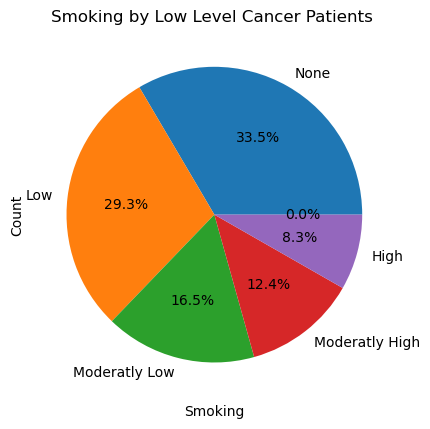

In [126]:
#Using the bins to demonstrate the percantage of smokers in low level patients.
smoking_bins_low = pd.cut(smoking_level_low["Smoking"], new_bins, labels=pollution_groups)
smoking_bins_low.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking by Low Level Cancer Patients ")
plt.show()

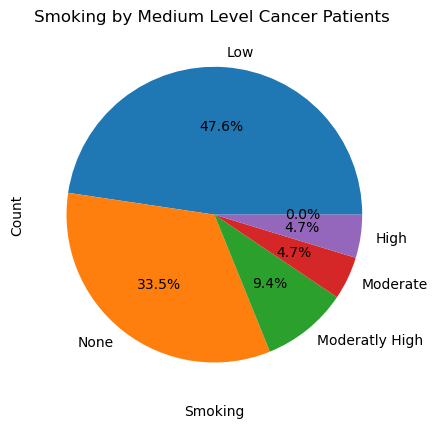

In [127]:
#Using the bins to demonstrate the percantage of smokers in meduim level patients.
smoking_bins_med = pd.cut(smoking_level_med["Smoking"], new_bins, labels=pollution_groups)
smoking_bins_med.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking by Medium Level Cancer Patients ")
plt.show()

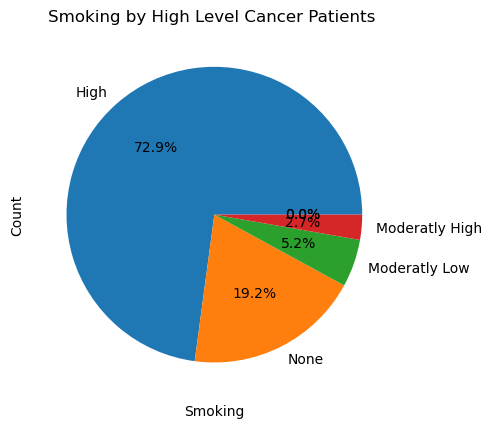

In [128]:
#Using the bins to demonstrate the percantage of smokers in high level patients.
smoking_bins_high = pd.cut(smoking_level_high["Smoking"], new_bins, labels=pollution_groups)
smoking_bins_high.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking by High Level Cancer Patients ")
plt.show()

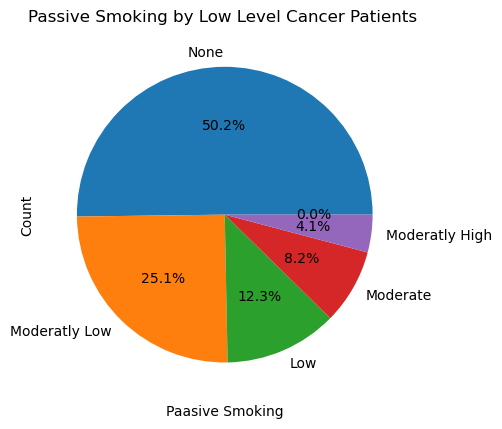

In [132]:
#Making a pie chart to display the percantage of smoking for low level cancer patients.
smoking_bins_low = pd.cut(smoking_level_low["Passive Smoker"], new_bins, labels=pollution_groups)
smoking_bins_low.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Paasive Smoking")
plt.ylabel("Count")
plt.title("Passive Smoking by Low Level Cancer Patients ")
plt.show()

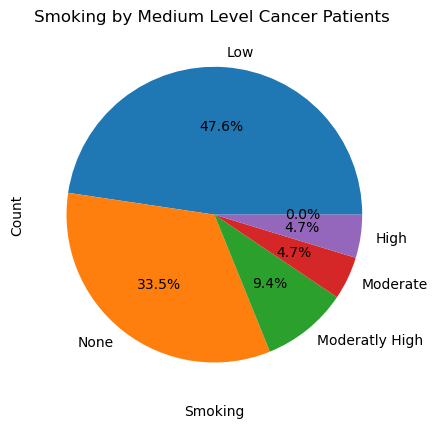

In [131]:
#Making a pie chart to display the percantage of smoking for medium level cancer patients.
smoking_bins_med = pd.cut(smoking_level_med["Smoking"], new_bins, labels=pollution_groups)
smoking_bins_med.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking by Medium Level Cancer Patients ")
plt.show()

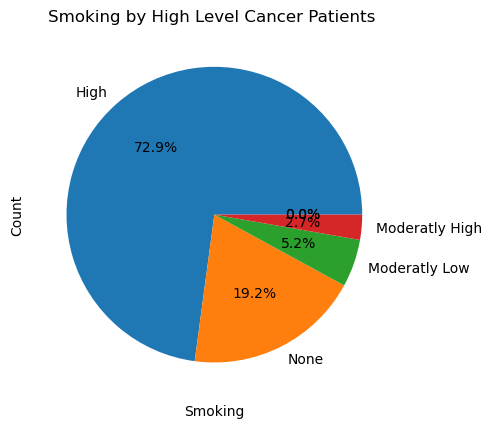

In [133]:
#Making a pie chart to display the percantage of smoking for high level cancer patients.
smoking_bins_high = pd.cut(smoking_level_high["Smoking"], new_bins, labels=pollution_groups)
smoking_bins_high.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking by High Level Cancer Patients ")
plt.show()

In [103]:
#Creating bins based on age
age_bins= [0,25,50,90]
age_groups= ["Young", "Adult", "Senior"]


In [104]:
#use pd.cut to categorize age based on the bins
cancer_df["Age Group"] = pd.cut(cancer_df["Age"], 
                                age_bins, labels=age_groups, include_lowest=True)
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Level,Age Group
0,P1,33,Male,2,4,5,4,3,2,2,4,3,2,2,Low,Adult
1,P10,17,Male,3,1,5,3,4,2,2,2,2,4,2,Medium,Young
2,P100,35,Male,4,5,6,5,5,4,6,7,2,3,4,High,Adult
3,P1000,37,Male,7,7,7,7,6,7,7,7,7,7,7,High,Adult
4,P101,46,Male,6,8,7,7,7,6,7,7,8,7,7,High,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,7,7,8,7,High,Adult
996,P996,37,Female,6,8,7,7,7,6,7,7,7,8,7,High,Adult
997,P997,25,Female,4,5,6,5,5,4,6,7,2,3,4,High,Young
998,P998,18,Female,6,8,7,7,7,6,7,7,8,7,7,High,Young


In [105]:
#Seperating the data based on age groups
young_group = cancer_df.loc[cancer_df["Age Group"] == "Young"]
adult_group = cancer_df.loc[cancer_df["Age Group"]== "Adult"]
senior_group = cancer_df.loc[cancer_df["Age Group"] == "Senior"]


In [106]:
#Creating a data frame by age group in passive smoking.
young_passive_smoking = young_group["Passive Smoker"].value_counts()
adult_passive_smoking = adult_group["Passive Smoker"].value_counts()
senior_passive_smoking = senior_group["Passive Smoker"].value_counts()

passive_smoking_summary = pd.DataFrame({
    "Young": young_passive_smoking,
    "Middle": adult_passive_smoking,
    "Senior": senior_passive_smoking
})

passive_smoking_summary.fillna(0)

,Young,Middle,Senior
1,20.0,40,0.0
2,58.0,143,83.0
3,10.0,120,10.0
4,48.0,112,1.0
5,0.0,20,10.0
6,0.0,30,0.0
7,19.0,149,19.0
8,10.0,87,11.0


In [193]:
#Creating a data frame by age group in smoking.
young_smoking = young_group["Smoking"].value_counts()
adult_smoking = adult_group["Smoking"].value_counts()
senior_smoking = senior_group["Smoking"].value_counts()

smoking_summary = pd.DataFrame({
    "Young": young_smoking,
    "Middle Age": adult_smoking,
    "Senior": senior_smoking
})

smoking_summary.fillna(0)

,Young,Middle Age,Senior
1,37,114.0,30.0
2,59,150.0,13.0
3,11,130.0,31.0
4,9,50.0,0.0
5,10,0.0,0.0
6,10,40.0,10.0
7,10,176.0,21.0
8,19,41.0,29.0


In [189]:
#Creating a data frame by age group in occupational hazards.
young_occup= young_group["OccuPational Hazards"].value_counts()
adult_occup= adult_group["OccuPational Hazards"].value_counts()
senior_occup = senior_group["OccuPational Hazards"].value_counts()

occup_summary = pd.DataFrame({
    "Young": young_occup,
    "Middle Age": adult_occup,
    "Senior": senior_occup
})

smoking_summary.fillna(0)


,Young,Middle Age,Senior
1,37,114.0,30.0
2,59,150.0,13.0
3,11,130.0,31.0
4,9,50.0,0.0
5,10,0.0,0.0
6,10,40.0,10.0
7,10,176.0,21.0
8,19,41.0,29.0


In [190]:
#Creating a data frame by age group in genetics
young_genetic= young_group["Genetic Risk"].value_counts()
adult_genetic= adult_group["Genetic Risk"].value_counts()
senior_genetic = senior_group["Genetic Risk"].value_counts()

genetic_summary = pd.DataFrame({
    "Young": young_genetic,
    "Middle Age": adult_genetic,
    "Senior": senior_genetic
})

smoking_summary.fillna(0)

,Young,Middle Age,Senior
1,37,114.0,30.0
2,59,150.0,13.0
3,11,130.0,31.0
4,9,50.0,0.0
5,10,0.0,0.0
6,10,40.0,10.0
7,10,176.0,21.0
8,19,41.0,29.0


In [191]:
#Creating a data frame by age group in obesity

young_obesity= young_group["Obesity"].value_counts()
adult_obesity= adult_group["Obesity"].value_counts()
senior_obesity = senior_group["Obesity"].value_counts()

obesity_summary = pd.DataFrame({
    "Young": young_obesity,
    "Middle Age": adult_obesity,
    "Senior": senior_obesity
})

smoking_summary.fillna(0)

,Young,Middle Age,Senior
1,37,114.0,30.0
2,59,150.0,13.0
3,11,130.0,31.0
4,9,50.0,0.0
5,10,0.0,0.0
6,10,40.0,10.0
7,10,176.0,21.0
8,19,41.0,29.0


In [200]:
#Creating a data frame by age group in alcohol
young_alcohol= young_group["Alcohol use"].value_counts()
adult_alcohol= adult_group["Alcohol use"].value_counts()
senior_alcohol = senior_group["Alcohol use"].value_counts()

alcohol_summary = pd.DataFrame({
    "Young": young_alcohol,
    "Middle Age": adult_alcohol,
    "Senior": senior_alcohol
})

alcohol_summary.fillna(0)

,Young,Middle Age,Senior
1,39.0,101,12
2,68.0,103,31
3,0.0,70,10
4,10.0,30,1
5,10.0,70,10
6,0.0,70,10
7,0.0,166,1
8,38.0,91,59


In [208]:
merge_df= pd.merge(obesity_summary, alcohol_summary , left_index=True, right_index=True, how='inner')
merge_df

,Young_x,Middle Age_x,Senior_x,Young_y,Middle Age_y,Senior_y
1,19.0,31,20.0,39.0,101,12
2,30.0,100,10.0,68.0,103,31
3,59.0,112,22.0,NaN,70,10
4,18.0,132,41.0,10.0,30,1
5,NaN,10,10.0,10.0,70,10
6,10.0,20,NaN,NaN,70,10
7,29.0,296,31.0,NaN,166,1


In [170]:
cities= ["Delhi", "Shanghai", "Sao Paulo", "Mexico City", "Dhaka",
          "Cairo", "Beijing", "Tianjin", "Manila", "Kinshasa", "Lagos", "Kolkata", 
          "Buenos Aires", "Istanbul", "Chongqing", "Karachi","Osaka","Mumbai", "Tokyo"]

In [181]:
url= "http://api.openweathermap.org/data/2.5/weather?" + weather_api_key



In [182]:
city_data =[]

base_url= url + "&q=" + city
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count=1
set_count=1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0



print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

record_count +=1

# Run an API request for each of the cities
try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url).json()
        # Parse out latitude, longitude
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,})
    # If an error is experienced, skip the city
except:
        print("City not found. Skipping...")
        pass    
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Tokyo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [183]:
city_df= pd.DataFrame(city_data)
city_df

""
